# SQL문법

## GROUP BY

* 컬럼의 값을 그룹화해 각 값들의 평균 값, 개수 등을 구하고자 할때 GROUP BY 이용
* 보통 AVG, SUM, COUNT 등과 같은 집계 함수들과 함께 사용

In [ ]:
# 예시 구문
SELECT 제조 국가,
AVG(가격)
FROM DB명.cars
GROUP BY 제조 국가;

In [ ]:
# 제조 국가별, 제조사별 평균 자동차 가격
SELECT 제조 국가, 제조사명, AVG(가격)
FROM DB명.cars
GROUP BY 제조 국가, 제조사명;

In [ ]:
# 요청사항: customers테이블을 이용해 국가, 도시별 고객 수를 구하시오
SELECT country, city, COUNT(customerNumber) as N_customers
FROM customers
GROUP BY country, city;

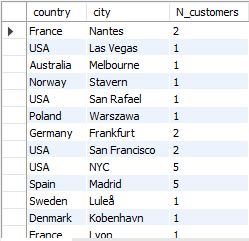

### 집계함수에 CASE WHEN 구문 사용하기

* CASE WHEN 구문을 사용하면 필요한 조건만 집계할 수 있다

In [ ]:
# 예시 구문
SELECT SUM(CASE WHEN 국가 = '한국' THEN 1 ELSE 0 END) KOREA_CNT
FROM TABLE;

In [ ]:
# 요청사항: customers 테이블을 이용해 USA 거주자의 수를 계산하고, 그 비중을 구하시오
SELECT SUM(CASE WHEN country = 'USA' THEN 1 ELSE 0 END) N_USA,
SUM(CASE WHEN country = 'USA' THEN 1 ELSE 0 END) / COUNT(*) USA_Portion
FROM customers;

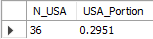

## JOIN

* 여러 가지 테이블로 나뉜 정보를 조합하려면 테이블 결합함수 JOIN을 사용해야 한다.

### 1. LEFT JOIN(LEFT OUTER JOIN)

* 특정 테이블의 정보를 기준으로 타 테이블을 결합한다.

In [ ]:
# 예시 구문1
# ON에는 어떤 킷값으로 데이터를 결합할지 입력해 준다.
# 예시 구문의 경우 TABLE_A의 Column1과 TABLE_B의 Column2를 매칭해 동일한 값이 존재하는 TABLE_B의 정보를 출력
SELECT *
FROM TABLE_A
LEFT JOIN TABLE_B
ON TABLE_A.Column1 = TABLE_B.Column2;

* LEFT JOIN은 FROM절의 테이블을 기준으로 매칭되는 정보를 호출
* order테이블의 정보는 모두 출력되고 customer의 고객ID중 order에 존재하는 고객ID 정보만 결합한다.
* order테이블의 고객ID: Y는 customer 테이블에 존재하지 않기 때문에 NULL로 출력된다.

In [ ]:
# 예시 구문2
SELECT *
FROM order
LEFT JOIN customers
ON oredr.고객 ID = customer.고객 ID;

In [ ]:
# 요청사항: customers, orders테이블을 결합하고 ordernumber와 country를 출력하세요
SELECT O.ordernumber, C.country
FROM orders O
LEFT JOIN customers C
ON O.customerNumber = C.customerNumber;

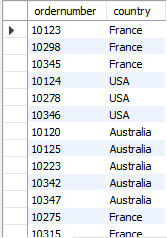

### 2. INNER JOIN

* 2가지 테이블에 공통으로 존재하는 정보만 출력한다.

In [ ]:
# 예시 구문
SELECT *
FROM TABLE_A
INNER JOIN TABLE_B
ON TABLE_A.Column1 = TABLE_B.Column2;

In [ ]:
# 요청사항: customers, orders 테이블을 이용해 USA거주자의 주문 번호, 국가를 출력하세요
SELECT O.ordernumber, C.country
FROM orders O
INNER JOIN customers C
ON O.customerNumber = C.customerNumber
WHERE C.country = 'USA';

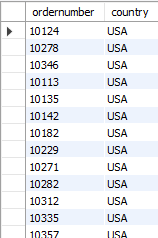

* 위 결과에서 만약, orders와 customers에 customerNumber가 빠짐없이 공통으로 존재한다면, LEFT JOIN을 실행한 결과와 동일한 결과가 출력된다.

### 3. FULL JOIN

* TABLE_A 또는 TABLE_B와 매칭되는 레코드를 모두 출력한다.

In [ ]:
# 예시 구문
SELECT *
FROM TABLE_A
FULL JOIN TABLE_B
ON TABLE_A.Column1 = TABLE_B.Column2;

SELECT *
FROM order
FULL JOIN customers
ON order.고객 ID = customer.고객 ID;

## CASE WHEN

* 조건에 따른 값을 다르게 출력하고 싶은 경우 사용된다.

In [ ]:
# 예시 구문
SELECT CASE WHEN 조건 1 THEN 결과 1
WHEN 조건 2 THEN 결과 2 ELSE 결과 3 END
FROM 데이터베이스.테이블 명;

* 조건 1을 만족하는 경우 결과 1을 출력하게 되고, 조건 2를 만족하는 경우 결과 2를 출력하고, 조건 1, 조건 2를 모두 만족하지 않는 경우 결과 3을 출력하게 된다.

In [ ]:
# 예시: 고객 정보 테이블에서 고객명과 고객의 연령대(10세 단위)를 출력하기
SELECT CASE WHEN 연령 BETWEEN 20 AND 29 THEN '20대'
WHEN 연령 BETWEEN 40 AND 49 THEN '40대'
WHEN 연령 BETWEEN 50 AND 59 THEN '50대' END
FROM DB명.테이블 명;

* 위 쿼리를 실행하면, 28세는 첫 번째 조건을 만족하므로 '20대'라는 값이 출력되고, 58세는 3번째 조건을 만족하므로 '50대', 48세는 2번째 조건을 만족하므로 '40대'가 출력된다. 위 3가지 조건을 모두 만족하지 못하는 경우는 NULL값이 출력된다.

In [ ]:
# 요청사항: customers의 country칼럼을 이용해 북미(Canada, USA), 비북미를 출력하는 컬럼을 생성하세요
SELECT country, CASE WHEN country IN ('Canada', 'USA') THEN 'North America'
ELSE 'Others' END as region
FROM customers;

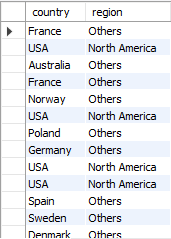

In [ ]:
# 요청사항: customers의 country칼럼을 이용해 북미(Canada, USA), 비북미를 출력하는 컬럼을 생성하고,
# 북미, 비북미 거주 고객의 수를 계산하세요
SELECT CASE WHEN country IN ('Canada', 'USA') THEN 'North America'
ELSE 'Others' END as region,
COUNT(customerNumber) N_customers
FROM customers
GROUP BY CASE WHEN country IN ('Canada', 'USA') THEN 'North America'
ELSE 'Others' END;

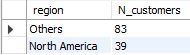

* 위 쿼리와 다음의 쿼리는 동일한 결과를 출력한다.
* GROUP BY에서 컬럼 명을 숫자로 대체 가능하다.
* 1은 SELECT의 첫 번째 컬럼을 의미하고, 2는 SELECT의 두 번째 컬럼을 의미한다.
* GROUP BY 1은 SELECT의 첫 번째 컬럼으로 그루핑하겠다는 의미임

In [ ]:
# GROUP BY컬럼명을 숫자로 대체
SELECT CASE WHEN country IN ('Canada', 'USA') THEN 'North America'
ELSE 'Others' END as region,
COUNT(customerNumber) N_customers
FROM customers
GROUP BY 1;

## RANK, DENSE_RANK, ROW_NUMBER

* RANK, DENSE_RANK, ROW_NUMBER는 데이터에 순위를 매기는데 사용한다.
* ROW_NUMBER(): 동점인 경우도 서로 다른 등수로 계산한다.
* DENSE_RANK, RANK: 동점인 경우 같은 등수로 계산한다.
* 이때 DENSE_RANK는 동점의 등수 바로 다음 수로 순위를 매기고, RANK는 동점인 경우의 데이터 세트를 고려해 다음 등수를 매긴다.

In [ ]:
# 예시 구문
SELECT *,
ROW_NUMBER() OVER(ORDER BY 구매 금액) ROWNUMBER,
RANK() OVER(ORDER BY 구매 금액) RANK,
DENSE_RANK() OVER(ORDER BY 구매 금액) DENSE_RANK
FROM TABLE;

* 만약 고객 번호 내에서 순위를 매기고 싶다면, 다음의 방법으로 가능하다.

In [ ]:
# 예시 구문
SELECT *,
ROW_NUMBER() OVER(PARTITION BY 고객 번호 ORDER BY 구매 금액)
ROWNUMBER,
RANK() OVER(pARTITON BY 고객 번호 ORDER BY 구매 금액) RANK,
DENSE_RANK() OVER(PARTITON BY 고객 번호 ORDER BY 구매 금액)
DENSE_RANK
FROM TABLE;

In [ ]:
# 요청사항: products 테이블에서 buyprice 컬럼으로 순위를 매겨주세요(오름차순, row_number, rank, dense_rank사용)
SELECT buyprice,
ROW_NUMBER() OVER(ORDER BY buyprice) RowNumber,
RANK() OVER(ORDER BY buyprice) RNk,
DENSE_RANK() OVER(ORDER BY buyprice) DenseRank
FROM products;

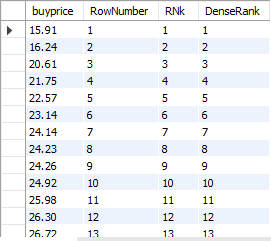

In [ ]:
# 요청사항: products 테이블의 productline별로 순위를 매겨주세요(buyprice컬럼 기준, row_number, rank, dense_rank사용)
SELECT buyprice,
ROW_NUMBER() OVER(PARTITION BY productline ORDER BY buyprice) RowNumber,
RANK() OVER(PARTITION BY productline ORDER BY buyprice) RNk,
DENSE_RANK() OVER(PARTITION BY productline ORDER BY buyprice) DenseRank
FROM products;

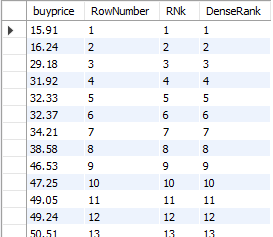

## SUBQUERY

* 'NYC'에 거주하는 고객들의 주문 번호를 조회해 주세요.'라는 요청에 대해 WHERE절의 IN연산자를 사용하면 처리할 수 있다.
* IN연산자 내부에 NYC거주 고객의 고객 번호를 출력하는 쿼리를 입력하면, 해당 고객 번호의 주문 번호를 모두 출력할 수 있다.

In [ ]:
# 예시 구문
SELECT ordernumber
FROM orders
WHERE customerNumber IN (select customernumber from customers where city = 'NYC');

* IN연산자 이후 ()내의 쿼리를 쿼리 안의 쿼리라는 의미로 서브쿼리(subquery)라고 한다.
* from, join에서도 사용할 수 있다.

In [ ]:
# from, join에 subquery를 사용하는 경우
SELECT customernumber
FROM (select customernumber from customers where city = 'NYC') A

* from에 subquery를 사용하면 subquery의 실행결과가 하나의 테이블로 사용된다.
* from, join에 subquery를 사용하는 경우에는 항상 subquery의 마지막에 'A'와 같은 문자열을 입력해 주어야 한다.
* subquery의 마지막에 A라는 문자열을 입력하면, 해당 테이블은 A라는 명칭으로 쿼리 내부에서 사용된다.

In [ ]:
# 요청사항: customers와 orders를 이용해 USA거주자의 주문 번호를 입력하시오
SELECT orderNumber
FROM orders
WHERE customerNumber IN(SELECT customerNumber FROM customers
WHERE country = 'USA');

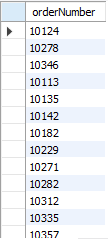